In [3]:
import json
import numpy as np

In [20]:
with open('../data/scraped_data.json') as f:
    data = json.load(f)
features = data["features"]
features

[{'coordinates': [35.2030857, 31.135752],
  'Concentration Uncertainty (ppm m)': 553.0,
  'Max Plume Concentration (ppm m)': 2895.0,
  'plume_complex_count': 1,
  'country_code': 'il'},
 {'coordinates': [35.20281459382317, 31.12788965249969, 0.0],
  'Concentration Uncertainty (ppm m)': 553.0,
  'Max Plume Concentration (ppm m)': 2895.0,
  'plume_complex_count': 1,
  'country_code': 'il'},
 {'coordinates': [36.2257362, 31.9133135],
  'Concentration Uncertainty (ppm m)': 343.0,
  'Max Plume Concentration (ppm m)': 1331.0,
  'plume_complex_count': 2,
  'country_code': 'jo'},
 {'coordinates': [36.229802987188734, 31.909788946709373, 0.0],
  'Concentration Uncertainty (ppm m)': 343.0,
  'Max Plume Concentration (ppm m)': 1331.0,
  'plume_complex_count': 2,
  'country_code': 'jo'},
 {'coordinates': [40.4513543, 35.3082313],
  'Concentration Uncertainty (ppm m)': 526.0,
  'Max Plume Concentration (ppm m)': 3401.0,
  'plume_complex_count': 3,
  'country_code': 'sy'},
 {'coordinates': [40.45650

In [19]:
countries = set(e["country_code"] for e in features)
len(countries)

38

In [28]:
cu = {country:[feature["Concentration Uncertainty (ppm m)"] for feature in features if feature["country_code"] == country] for country in countries}

mpc = {country:[feature["Max Plume Concentration (ppm m)"] for feature in features if feature["country_code"] == country] for country in countries}

n = {country:sum([1 for feature in features if feature["country_code"] == country]) for country in countries}


In [44]:
def imei(mpc, cun, emc):
    return (mpc/1000*0.4 + (cun/(cun+mpc))*100*0.2 + emc*0.4)/10

imei(5000, 600, 3), imei(25000, 5000, 4)

result = []
for country in countries:
    IMEI = imei(sum(mpc[country]), sum(cu[country]), n[country])
    result.append((country, IMEI))

result

[('za', 1.5641430770358427),
 ('il', 1.3558265112375267),
 ('mx', 4.174393127807754),
 ('br', 1.9428104729660407),
 ('cl', 1.038096604679064),
 ('bw', 0.6077658869908016),
 ('tm', 51.14120501759614),
 ('sy', 6.479717893374323),
 ('it', 0.961777482185273),
 ('dz', 9.558287833731614),
 ('ir', 26.002824128452392),
 ('fr', 0.596978138747885),
 ('cn', 22.05157909275207),
 ('om', 1.8217732045416035),
 ('tn', 0.813967415973979),
 ('ly', 4.299294478628272),
 ('kz', 8.371411725043517),
 ('uz', 8.562543885752026),
 ('jo', 4.063012293972617),
 ('sa', 2.159586630897901),
 ('tr', 0.9225089399965416),
 ('in', 3.126401294205196),
 ('th', 2.1479584779012053),
 ('ps', 0.8673419076508259),
 ('bd', 1.0374076835907122),
 ('pk', 6.461774161220044),
 ('eg', 3.7885691007183153),
 ('co', 1.4397790000860513),
 ('kw', 0.7196472597864769),
 ('ae', 0.6704653603798014),
 ('ye', 3.6417221304433283),
 ('ar', 2.123909974445467),
 ('iq', 4.367530248290752),
 ('np', 0.7667212093261594),
 ('es', 1.07170291152931),
 ('pe

In [45]:
result.sort(key=lambda x: x[1], reverse=True)

import pycountry
for r in result:
    print(pycountry.countries.get(alpha_2=r[0]).name, r[1], sep="\t\t\t")

Turkmenistan			51.14120501759614
Iran, Islamic Republic of			26.002824128452392
China			22.05157909275207
United States			20.77865018530585
Algeria			9.558287833731614
Uzbekistan			8.562543885752026
Kazakhstan			8.371411725043517
Syrian Arab Republic			6.479717893374323
Pakistan			6.461774161220044
Iraq			4.367530248290752
Libya			4.299294478628272
Mexico			4.174393127807754
Jordan			4.063012293972617
Australia			3.9330172050474537
Egypt			3.7885691007183153
Yemen			3.6417221304433283
India			3.126401294205196
Saudi Arabia			2.159586630897901
Thailand			2.1479584779012053
Argentina			2.123909974445467
Brazil			1.9428104729660407
Oman			1.8217732045416035
South Africa			1.5641430770358427
Colombia			1.4397790000860513
Israel			1.3558265112375267
Spain			1.07170291152931
Chile			1.038096604679064
Bangladesh			1.0374076835907122
Italy			0.961777482185273
Turkey			0.9225089399965416
Peru			0.908801963190184
Palestine, State of			0.8673419076508259
Tunisia			0.813967415973979
Nepal			0.7667

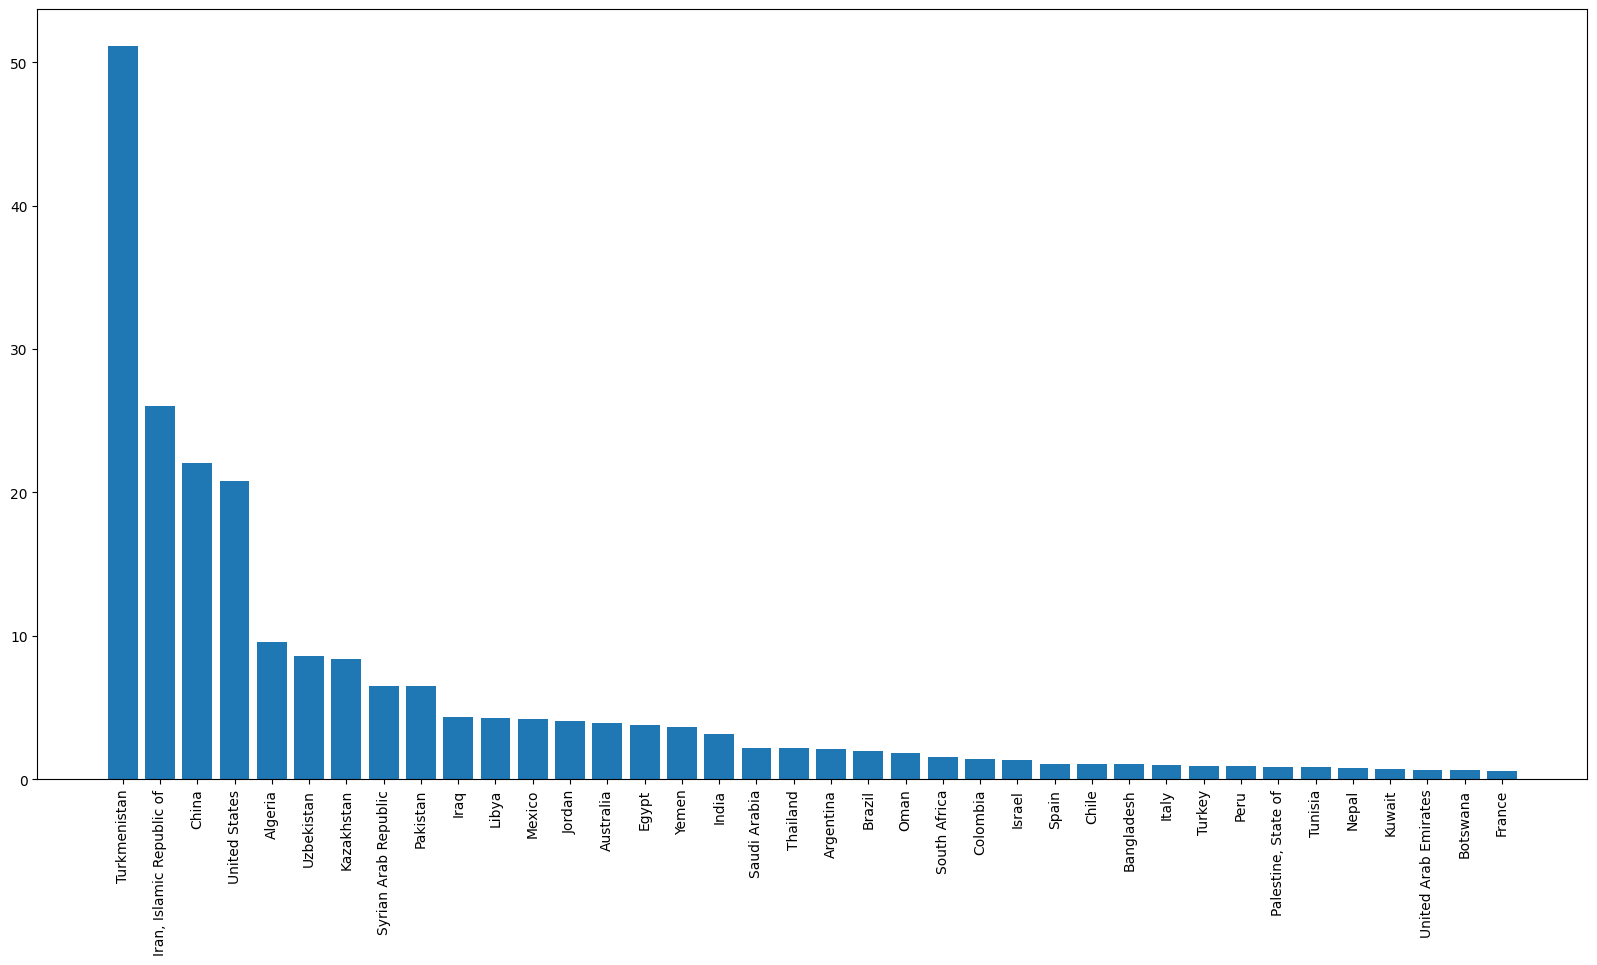

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# print a plot where for each country we can see the IMEI

plt.figure(figsize=(20, 10))
plt.bar([pycountry.countries.get(alpha_2=r[0]).name for r in result], [r[1] for r in result])
plt.xticks(rotation=90)
None


In [73]:
# encode results to json
result_json = {pycountry.countries.get(alpha_2=r[0]).alpha_3 : r[1] for r in result}
result_json

f = open("../data/imei.json", "w")
f.write(json.dumps(result_json))

1004

In [74]:
f.close()